# MSA 2025 Phase 2 - Part 2: Minimum Temperature Prediction from Weather Data

In [ ]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Load and check the dataset

In [37]:
weather = pd.read_csv("Summary of Weather.csv")
weather.head()

C:\Users\jaqli\AppData\Local\Temp\ipykernel_27948\1093861182.py:1: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  weather = pd.read_csv("Summary of Weather.csv")


,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [221]:
weather.loc[abs(weather['MinTemp']+17.77777) < 0.1, ["MinTemp", "MIN"]]

,MinTemp,MIN
10116,-17.777778,NaN
10117,-17.777778,NaN
10118,-17.777778,NaN
10119,-17.777778,NaN
10120,-17.777778,NaN
...,...,...
111273,-17.777778,NaN
111278,-17.777778,NaN
111279,-17.777778,NaN
113916,-17.777778,NaN


In [211]:
len(weather)

119040

## 2. Clean the dataset, drop variables

<Axes: >

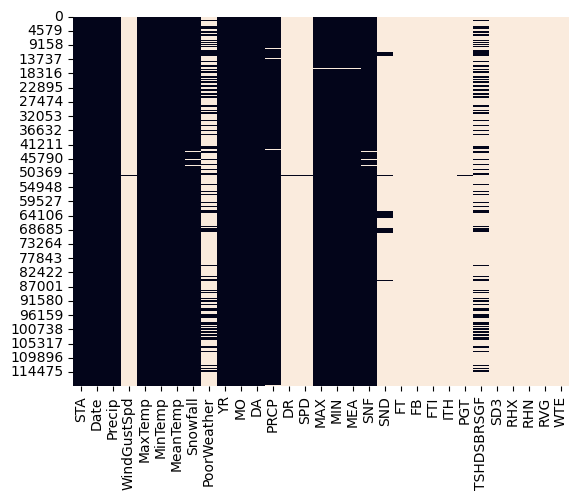

In [222]:
sns.heatmap(weather.isnull(), cbar=False)

In [105]:
np.all(weather["PoorWeather"].dropna() == weather["TSHDSBRSGF"].dropna())
weather["SND"].unique()

array([nan,  0.])

In [106]:
weather["PoorWeather"].value_counts()

1             25846
1.0            6134
0               870
1     1         310
100000          263
1 1             133
1 1  1           96
1000             91
100001           62
1    1           56
101000           56
1000001000       52
1  1             49
1000001001       45
11               39
1100000          16
1001             16
1   1 1          14
101001           14
1000101001       13
1000101000        9
11 1              8
1000000           7
1000000000        6
1     1  1        5
11    1           5
1010001000        5
1010001001        2
1 0  1            2
1   1 1  1        2
1000100001        2
1101000           2
10001001          1
1     0           1
1000100000        1
1 0               1
1101001           1
1   1             1
1        1        1
Name: PoorWeather, dtype: int64

TSHDSBRSGF refers to a variety of weather types, so the binary strings are combinations of effects. Given the small counts of most strings, I'll code 0 and nan as a 0 and anything else as a 1

In [230]:
weather.dropna(subset=["MIN", "MAX", "MEA"], inplace=True)
cleanWeather = weather.iloc[:, 0:9].copy()
cleanWeather["PoorWeather"] = cleanWeather["PoorWeather"].fillna(value=0)
cleanWeather["PoorWeather"].replace(".*1.*",1, regex=True, inplace=True)
cleanWeather["PoorWeather"].replace("0", 0, inplace=True)


cleanWeather["Precip"].replace("T", 0.1, inplace=True)
cleanWeather["Precip"] = pd.to_numeric(cleanWeather["Precip"], errors="raise")

cleanWeather["Snowfall"] = pd.to_numeric(cleanWeather["Snowfall"], errors='coerce')


cleanWeather = cleanWeather.drop("WindGustSpd", axis = 1)
# cleanWeather = cleanWeather.dropna(axis=0)
cleanWeather = cleanWeather.sort_values("Date", ascending=False)
cleanWeather


,STA,Date,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather
105367,50802,1945-9-9,0.000,28.888889,18.333333,23.333333,0.0,0.0
41061,13201,1945-9-9,0.100,27.222222,22.222222,24.444444,0.0,1.0
88521,33405,1945-9-9,0.000,42.777778,22.777778,32.777778,0.0,0.0
26264,11615,1945-9-9,20.320,28.333333,22.222222,25.555556,0.0,1.0
56504,22504,1945-9-9,0.000,32.222222,23.333333,27.777778,0.0,0.0
...,...,...,...,...,...,...,...,...
57886,22508,1940-1-10,0.508,23.333333,14.444444,18.888889,0.0,0.0
6298,10701,1940-1-10,0.000,33.888889,22.777778,28.333333,0.0,0.0
6289,10701,1940-1-1,7.620,28.333333,22.222222,25.555556,0.0,0.0
57877,22508,1940-1-1,0.254,23.333333,17.222222,20.000000,0.0,0.0


<Axes: >

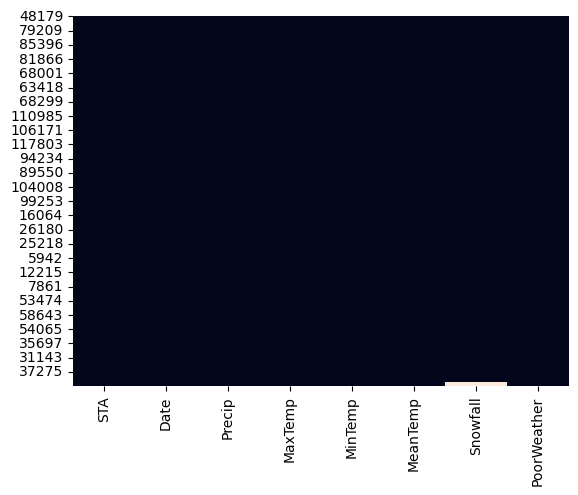

In [194]:
sns.heatmap(cleanWeather.isnull(), cbar=False)

<Axes: xlabel='Snowfall', ylabel='Count'>

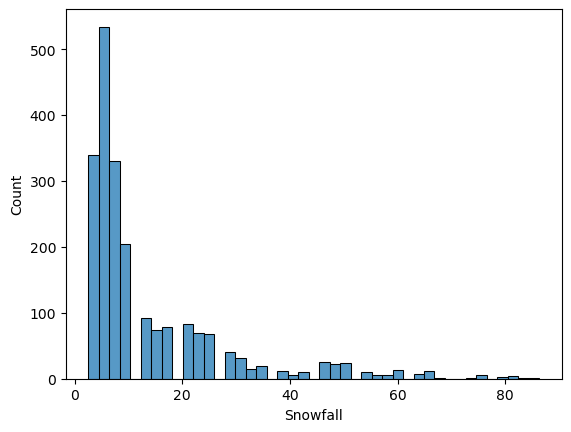

In [180]:
sns.histplot(cleanWeather.loc[cleanWeather['Snowfall'] > 0, 'Snowfall'])

In [195]:
cleanWeather.dtypes

STA              int64
Date            object
Precip         float64
MaxTemp        float64
MinTemp        float64
MeanTemp       float64
Snowfall       float64
PoorWeather    float64
dtype: object

In [64]:
cleanWeather.isnull().any().any()

False

In [ ]:
len(cleanWeather["STA"].unique())

144

([<matplotlib.axis.XTick at 0x2251ea9da30>,
 [Text(0, 0, '1945-9-9'),
  Text(365, 0, '1944-9-9'),
  Text(730, 0, '1944-1-1'),
  Text(1095, 0, '1943-1-1')])

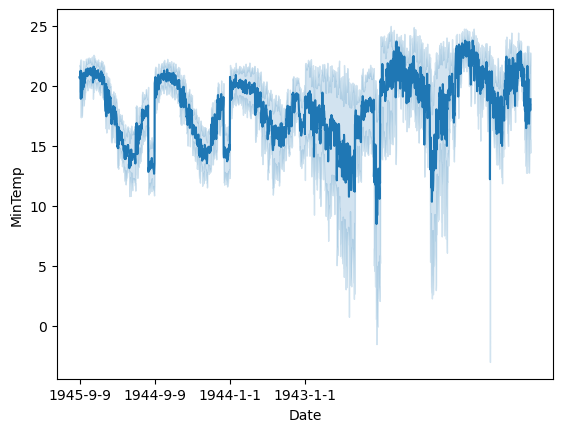

In [201]:

sns.lineplot(x='Date', y='MinTemp', data=cleanWeather)
plt.xticks(range(0,1100,365))

## 3. Select the feature(s) for the model, and explain the reason

In [10]:
cleanWeather["STA"]

4071     10502
4079     10502
4080     10502
4063     10502
4084     10502
         ...  
29024    11704
75534    32805
15137    10803
95280    34150
52236    21501
Name: STA, Length: 33610, dtype: int64

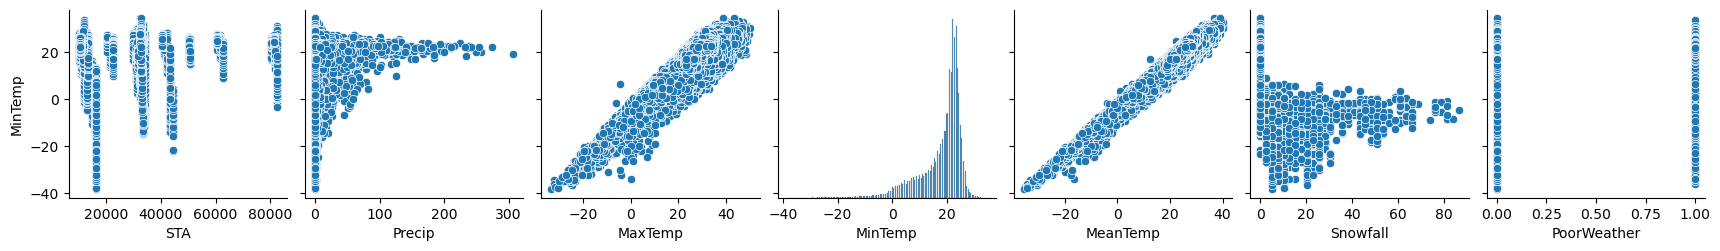

In [231]:
# write your answer here
sns.pairplot(data=cleanWeather, y_vars="MinTemp")

<Axes: xlabel='PoorWeather', ylabel='MinTemp'>

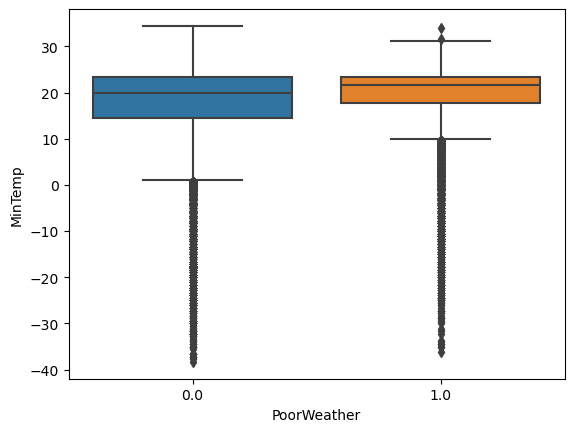

In [207]:
sns.boxplot(y="MinTemp", x="PoorWeather", data=cleanWeather)

## 4. Split the dataset (80% for training, 20% for testing)

In [233]:

import sklearn.model_selection


sklearn.model_selection.train_test_split(cleanWeather, test_size = 0.2)

[          STA        Date  Precip    MaxTemp    MinTemp   MeanTemp  Snowfall  \
 39134   13005   1945-1-10   0.000  13.888889   3.333333   8.888889       0.0   
 21463   11604   1942-1-20   0.000  28.333333  25.000000  26.666667       0.0   
 80929   33023   1944-8-12   0.000  30.555556  17.777778  24.444444       0.0   
 37058   12801   1945-5-29   0.000  31.666667  20.555556  26.111111       0.0   
 32948   12001    1943-7-3   0.000  37.777778  19.444444  28.888889       0.0   
 ...       ...         ...     ...        ...        ...        ...       ...   
 11698   10718   1943-5-12   0.254  31.666667  23.888889  27.777778       0.0   
 42397   13601   1945-6-11   2.540  23.333333  20.000000  21.666667       0.0   
 31137   11901   1944-6-30   2.286  23.888889  12.777778  18.333333       0.0   
 101983  50401  1945-11-23   6.096  30.555556  22.777778  26.666667       0.0   
 7733    10701  1943-12-22   0.100  28.888889  22.777778  25.555556       0.0   
 
         PoorWeather  
 39

## 5. Choose the algorithm, train and test the model

## 6. Evaluate and Visualize model Performance

## 7. What is the R² value and RMSE of the model? How these values indicate the model performance?

In [77]:
# write your answer here

## 8. Discuss the model performance based on the plot

In [78]:
# write your answer here